# Ejemplo numérico de Localización

Programa que estima la posición de un robot en un mundo de cinco estados.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
def imprimirBelief(p):
    width = 1/1.5
    N = len(p)
    indices = range(N)
    plt.bar(indices, p, width, color="blue")
    plt.xlabel('Mundo (X)')
    plt.ylabel('Probabilidad p(x_i)')
    plt.show()

### Creencia (belief)

Primero vamos a definir el mundo y estableceremos la creencia (belief) de nuestro estado en el mundo. Como no sabemos en que parte nos encontramos entonces tenemos un estado de maxima incertidumbre.

$
p(x_i) = 1/n
$

[0.2, 0.2, 0.2, 0.2, 0.2]


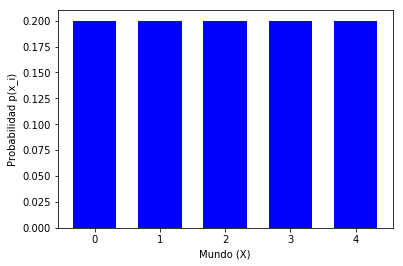

In [3]:
mundo = ["cerrado", "abierto", "abierto", "cerrado", "cerrado"]

maxima_incertidumbre = [0.2, 0.2, 0.2, 0.2, 0.2]
p = maxima_incertidumbre

# Grafiquemos la distribución de la creencia   
print(p)
imprimirBelief(p)

### Percepción (measurement)

Actualizaremos la probabilidad dada una percepción del robot

In [4]:
p_sensor_acierta = 0.6
p_sensor_falla = 0.4

In [5]:
#Estima la creencia de estar en un estado dada una lectura
def sensar(p, z):
	q = []
	for i in range(len(p)):
		if mundo[i]==z:
			q.append(p_sensor_acierta * p[i])
		else:
			q.append(p_sensor_falla * p[i])
	s = sum(q)
	for i in range(len(q)):
		q[i] = q[i]/s
	return q


[0.16666666666666669, 0.24999999999999997, 0.24999999999999997, 0.16666666666666669, 0.16666666666666669]


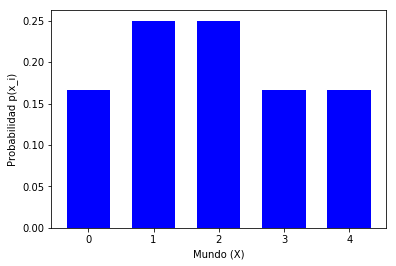

In [6]:
p_next = sensar(p, "abierto")

print(p_next)
imprimirBelief(p_next)

### Movimiento exacto

Como se vería afectada la creencia si el robot se moviera exactamente una celda a la derecha? Intuitivamente se "recorrerian las creencias"

[0.16666666666666669, 0.16666666666666669, 0.24999999999999997, 0.24999999999999997, 0.16666666666666669]


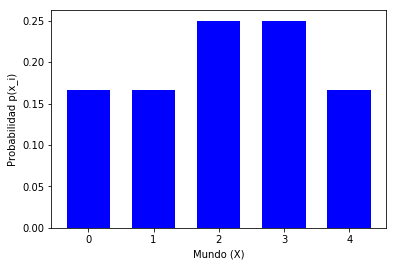

In [7]:
def shiftR(l, m):
    return l[-m:] + l[:-m]

p_tm1 = shiftR(p_next, 1) 
print(p_tm1)
imprimirBelief(p_tm1)

### Movimiento inexacto



In [8]:
p_no_llega = 0.1
p_se_pasa = 0.1
p_exacto = 0.8

In [9]:
#Estima la creencia de estar en un estado dado un movimiento (control)
def mover(p, u):
	q = []
	n = len(p)
	for i in range(len(p)):
		# no llega
		s1 = p[(i-(u-1))%n] * p_no_llega
		s2 = p[(i-u)%n] * p_exacto
		s3 = p[(i-(u+1))%n] * p_se_pasa
		q.append(s1+s2+s3)
	return q

In [10]:
# primero probemos con un estado conocido 
p_conocido = [0, 1, 0, 0, 0]

p_tm1 = mover(p_conocido, 1)

print(p_tm1)

[0.0, 0.1, 0.8, 0.1, 0.0]


### Ciclo de movimiento percepción

In [11]:
# Dada la siguiente secuencia cual cress que sea la posición de robot?
p = maxima_incertidumbre
p = sensar(p, "abierto")
p = mover(p, 1)
p = sensar(p, "abierto")
p = mover(p,1)
p = sensar(p, "abierto")


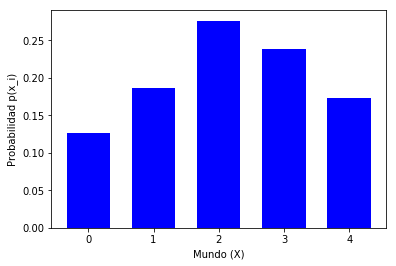

In [12]:
# verifiquemos
imprimirBelief(p)